# DONT COMMIT THE FILE

# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [20]:
# Your code here
import pandas as pd
df = pd.read_csv("PS_20174392719_1491204439457_log.csv")
paysim = df.sample(n=100000, random_state = 40)

### What is the distribution of the outcome? 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017778E3CB00>,
      dtype=object)

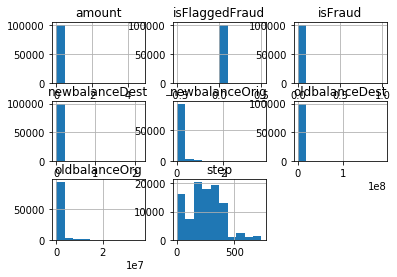

In [21]:
# Your response here
paysim.hist()

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [22]:
paysim.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4836640,347,PAYMENT,14491.89,C760502617,0.00,0.00,M1169687643,0.00,0.00,0,0
3401838,255,PAYMENT,19879.48,C2009509159,69479.00,49599.52,M1621685581,0.00,0.00,0,0
199628,13,CASH_IN,132780.97,C1180799370,3364977.39,3497758.36,C1075238398,3771343.46,3638562.49,0,0
2318265,188,CASH_OUT,160818.25,C1150042374,0.00,0.00,C345684073,692798.76,853617.01,0,0
3033819,234,CASH_OUT,106847.08,C253067419,30177.00,0.00,C1276274629,0.00,106847.08,0,0


In [23]:
# Your code here
paysim.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [24]:
### The step should be displayed as an time series. But we only have the information that the time period is a month.
import datetime



paysim["time"] = pd.to_datetime(paysim["step"])

In [25]:
#Drop the name columns because they have to many unique values
paysim = paysim.drop(["nameOrig", "nameDest"], axis =1 )

In [26]:
#now that we have the time column we can drop the step one
paysim = paysim.drop("step", axis = 1)

In [27]:
#now we need to deal with the type column.

paysim_modif = pd.concat([paysim, paysim["type"].str.get_dummies(" , ")], axis=1)
paysim_modif.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,time,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
4836640,PAYMENT,14491.89,0.00,0.00,0.00,0.00,0,0,1970-01-01 00:00:00.000000347,0,0,0,1,0
3401838,PAYMENT,19879.48,69479.00,49599.52,0.00,0.00,0,0,1970-01-01 00:00:00.000000255,0,0,0,1,0
199628,CASH_IN,132780.97,3364977.39,3497758.36,3771343.46,3638562.49,0,0,1970-01-01 00:00:00.000000013,1,0,0,0,0
2318265,CASH_OUT,160818.25,0.00,0.00,692798.76,853617.01,0,0,1970-01-01 00:00:00.000000188,0,1,0,0,0
3033819,CASH_OUT,106847.08,30177.00,0.00,0.00,106847.08,0,0,1970-01-01 00:00:00.000000234,0,1,0,0,0


In [28]:
paysim_modif = paysim_modif.drop("type", axis = 1)

In [29]:
from datetime import datetime as dt

def convert_date_to_ordinal(date):
    return date.toordinal()


paysim_modif["time"] = paysim_modif["time"].apply((lambda x: convert_date_to_ordinal(x))) 

### Run a logisitc regression classifier and evaluate its accuracy.

In [49]:
# Your code here
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = paysim_modif.drop("isFraud", axis = 1)
y =paysim_modif["isFraud"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=43)
lr = LogisticRegression() ##inicialization
model_lr = lr.fit(X_train,y_train)
acc1 = lr.score(X_test,y_test)*100    

C:\Users\mari_\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [51]:
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score


selector = RFE(lr, 2, step = 1)

selector = selector.fit(X_train, y_train)
selector.ranking_

X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X, y, test_size=0.2, train_size=0.8)

paysim_reduced = LogisticRegression()
model_reduced = paysim_reduced.fit(X_train_reduced, y_train_reduced)
y_pred_reduced = paysim_reduced.predict(X_train_reduced)

acc2 = paysim_reduced.score(X_test_reduced,y_test_reduced)*100  

C:\Users\mari_\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mari_\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mari_\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mari_\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mari_\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

In [52]:
print(acc1)
print(acc2)

99.91
99.905


### Now pick a model of your choice and evaluate its accuracy.

In [55]:
# Your code here
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


paysim_reduced_knn =  KNeighborsClassifier(n_neighbors = 3)
model_reduced_knn = paysim_reduced_knn.fit(X_train_reduced, y_train_reduced)
y_pred_reduced_knn = paysim_reduced_knn.predict(X_train_reduced)

acc3 = paysim_reduced_knn.score(X_test_reduced,y_test_reduced)*100  


acc3

99.88

### Which model worked better and how do you know?

In [ ]:
# Your response here

###The linear model because it was the best accurecy score.